# Linear Regression 

Linear regression model are good for regression tasks. We are familiar with the simplest form of  linear regression (drawing a straight line) but we can use this model for far more complex stuffs and data points.

In this section we are going to deal with intutive talks about the maths behind linear regression and how a linear model can be generalized for complex data.

In [1]:
# some basic imports 
%matplotlib inline
import matplotlib.pyplot as plt # for plotting 
import seaborn as sns; sns.set()

import numpy as np # for matrix maths

# Simple Linear Regression 

We will start with one of the most basic linear regression which is fitting a stratight line of the form $y = ax + b$.

Where $a$ is *slope* of the line, and $b$ is considered as *intercept* of the line.

Consider the following data with the slope of *2* and intercept of *-5*:

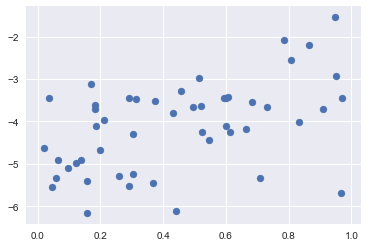

In [2]:
# setting a range
rng = np.random.RandomState(42)

# x values 
x = rng.rand(50)

# y values 
y = 2 * x -5 + rng.randn(50)

# plotting the scatter 
plt.scatter(x,y);

We can use *Scikit-learn's* `LinearRegression` estimator to fit this data and construct the best fit.

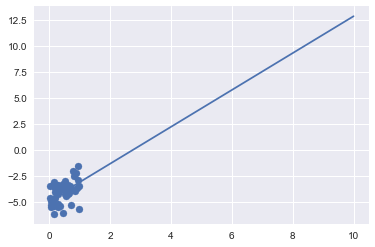

In [3]:
# importing linear regression 
from sklearn.linear_model import LinearRegression

# modelling an object of LR 
model = LinearRegression(fit_intercept=True)

# fitting the model 
model.fit(x[:,np.newaxis],y)

# making a test data set 
xfit = np.linspace(0,10,1000)

# predicting for xfit
yfit = model.predict(xfit[:,np.newaxis])

# plotting the graph
plt.scatter(x,y) # scatter plot
plt.plot(xfit,yfit); # line plot

The slope and intercept of the model are:

In [4]:
print("The slope is",model.coef_[0])
print("The intercept is ",model.intercept_)

The slope is 1.7765660038531037
The intercept is  -4.903310725531113


The `LinearRegression` model is much more capable of this, however-in adition to simple straight-lines fits, it can also handle multidimensional linear model of the form:

**y = a<sub>0</sub>x<sub>0</sub> + a<sub>1</sub>x<sub>1</sub> + a<sub>2</sub>x<sub>2</sub> + .....**

Where there are multiple values $x$ we can fit a hyper-plane or consider a plane in three-dimesion

The multidimensional data is hard to visualize, but we can fit that data easily, for example:

In [5]:
# making a 3-d data 
X = 10 * rng.rand(100,3)

# target data 
y = 0.5 + np.dot(X,[1.5, -2., 1.])

# fitting model 
model.fit(X,y)

print("Intercept",model.intercept_)
print("Coefficients", model.coef_)

Intercept 0.49999999999999556
Coefficients [ 1.5 -2.   1. ]


Here $y$ data is constructed from three $x$ values, and the linear regression recovers the coefficient used to construct data 


In this way we can use single `LinearRegression` estimator to fit the lines, planes and hyper-planes. It still appears that only data having linear relationship and 